In [1]:
##----------Import packages

##Before running In anaconda prompt write 
# pip install scikit-image
# pip install opencv-python
# pip install plotly


#Basic packages (math and statistics)
import pandas as pd
import numpy as np
from scipy import ndimage as ndi
from scipy import stats
import math
import glob

#Segmentation library
from skimage.exposure import histogram
from skimage.color import label2rgb
from skimage import data, io, filters
from skimage.filters import threshold_local
from skimage.feature import peak_local_max
from skimage.feature import canny
from skimage import measure
from skimage.morphology import label
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

#basic plots
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

#Interactive chart
import plotly.offline as py
import json

In [2]:
#Data
df_100_8 = pd.read_csv('results_Ni100-8h.txt', delimiter = ",")
df_60_8 = pd.read_csv('results_Ni60-8h.txt', delimiter = ",")
df_100_12 = pd.read_csv('results_Ni100-12h.txt', delimiter = ",")
df_60_12 = pd.read_csv('results_Ni60-12h.txt', delimiter = ",")
df_60_enc = pd.read_csv('results_enc_Ni60.txt', delimiter = ",")
df_100_enc = pd.read_csv('results_enc_Ni100.txt', delimiter = ",")

In [3]:
df_60_8.describe()

,area,perimeter,centroid-0,centroid-1,orientation,eccentricity,major_axis_length,minor_axis_length,Av_diam,ecc_inv,ecc2,Circ1,Circ2
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,1.487897,4.422375,386.416889,500.717447,-0.031843,0.417695,1.516831,1.222759,1.369795,3.009265,0.870823,0.936173,1.087861
std,0.774821,1.447415,214.257696,286.858047,0.898429,0.205862,0.718051,0.211178,0.416413,1.504817,0.157702,0.096244,0.200536
min,0.555485,2.605886,12.165312,9.562069,-1.560249,0.082930,0.855977,0.570864,0.841345,1.009953,0.140047,0.290390,0.951193
25%,0.950006,3.512748,201.985043,249.698745,-0.768357,0.270429,1.137604,1.067236,1.103653,1.926394,0.854711,0.938553,1.021428
50%,1.319278,4.153996,389.697802,493.581395,-0.126707,0.365788,1.351966,1.227626,1.299097,2.733824,0.930698,0.959186,1.042551
75%,1.783234,4.888325,574.284238,743.723214,0.698075,0.519105,1.621782,1.364834,1.517889,3.697832,0.962740,0.979022,1.065470
max,7.025628,15.579823,756.820847,1008.339713,1.569096,0.990145,8.176747,1.870401,4.660939,12.058409,0.996555,1.051312,3.443644


In [4]:
df_60_2t.describe()

NameError: name 'df_60_2t' is not defined

In [9]:
describe_100=df_100_8.describe()
describe_60=df_60_8.describe()
describe_100_2=df_100_12.describe()
describe_60_2=df_60_12.describe()
#diff = describe_100-describe_60

#diff

results = pd.concat([df_60_12,df_100_12], 
                    keys=['60nm 12h','100nm 12h'],
                    names=['thickness', None]).reset_index(level='thickness')
results_enc = pd.concat([df_60_enc,df_100_enc], 
                    keys=['60nm enc.','100nm enc.'],
                    names=['thickness', None]).reset_index(level='thickness')
type(results)

#results.dic.apply(pd.Series)
#results['thickness'] = np.where[results['Series name']== '100nm', 100, 60]
                                
results

,thickness,area,perimeter,centroid-0,centroid-1,orientation,eccentricity,major_axis_length,minor_axis_length,Av_diam,ecc_inv,ecc2,Circ1,Circ2
0,60nm 12h,1.413963,4.696516,17.457589,474.859375,1.101276,0.848983,1.854339,0.979871,1.417105,1.177880,0.528421,0.805557,1.241377
1,60nm 12h,1.530741,5.047226,20.711340,376.253608,1.080712,0.893564,2.095054,0.940544,1.517799,1.119114,0.448936,0.755103,1.324323
2,60nm 12h,1.000505,3.644385,21.763407,995.249211,-1.516014,0.514575,1.220226,1.046277,1.133252,1.943352,0.857445,0.946631,1.056378
3,60nm 12h,1.294029,4.510352,32.563415,243.170732,-0.045066,0.858828,1.801253,0.922718,1.361986,1.164378,0.512265,0.799342,1.251029
4,60nm 12h,1.133064,3.975818,32.303621,655.944290,-0.921095,0.741790,1.469660,0.985601,1.227631,1.348090,0.670632,0.900765,1.110168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,100nm 12h,1.211968,3.995095,732.677083,690.583333,-1.294157,0.609409,1.395843,1.106703,1.251273,1.640934,0.792856,0.954216,1.047981
608,100nm 12h,1.117283,3.849827,735.991525,321.774011,-0.227987,0.301027,1.224424,1.167630,1.196027,3.321962,0.953616,0.947307,1.055624
609,100nm 12h,2.146194,5.680489,743.279412,110.707353,-1.568556,0.852711,2.293492,1.198081,1.745787,1.172730,0.522383,0.835810,1.196445
610,100nm 12h,0.899508,3.452576,743.392982,600.768421,-0.303299,0.567709,1.180124,0.971513,1.075818,1.761465,0.823229,0.948262,1.054561


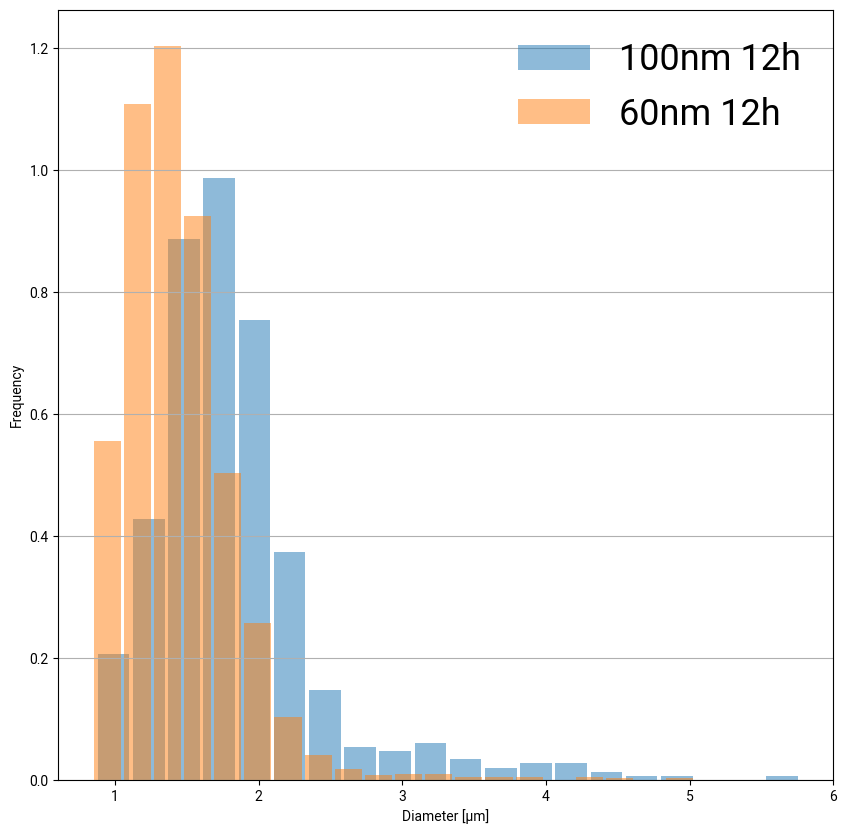

In [10]:

fig, ax = plt.subplots()
#results.groupby('thickness')['Av_diam'].plot.kde(ax=ax, legend=True)
results.groupby('thickness')['Av_diam'].plot.hist(density=True, ax=ax,bins=20, rwidth=0.9,alpha=0.5,legend=True)
ax.set_xlabel('Diameter [µm]')
ax.grid(axis='y')
#ax.set_facecolor('#d8dcd6')

#results.groupby('thickness')['Av_diam'].hist(legend=True,alpha=0.5,bins=20,density=True)
#plt.title('Commute Times for 1,000 Commuters')
#plt.xlabel('Counts')
#plt.ylabel('Commute Time')
#plt.grid(axis='y', alpha=0.75)

In [11]:
results.groupby('thickness')['Av_diam','Circ2'].describe()

<ipython-input-11-bdab6648c3dd>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Av_diam                                                              \
            count      mean       std       min       25%       50%       75%   
thickness                                                                       
100nm 12h   612.0  1.829492  0.596312  0.869336  1.488439  1.721789  2.028329   
60nm 12h   1855.0  1.444436  0.396029  0.842347  1.179650  1.381179  1.622953   

                      Circ2                                                    \
                max   count      mean       std       min       25%       50%   
thickness                                                                       
100nm 12h  5.767275   612.0  1.247121  0.318624  0.984119  1.094811  1.162102   
60nm 12h   5.036794  1855.0  1.183113  0.219774  0.972811  1.072293  1.133787   

                               
                75%       max  
thickness                      
100nm 12h  1.265398  3.861126  
60nm 12h   1.227783  4.436181

NameError: name 'df_60_2t' is not defined

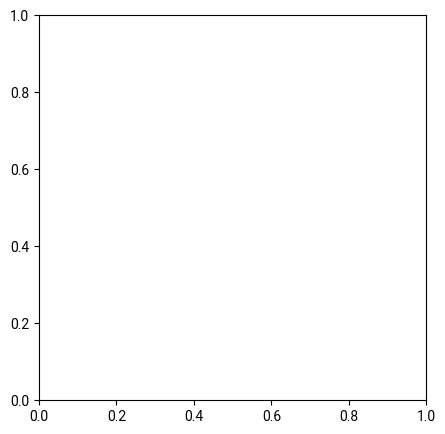

In [12]:
import seaborn as sns
mpl.style.use('default')
plt.rc('lines',linewidth=2)
#plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["legend.frameon"] = False
plt.rc('legend',fontsize=26)
results=results.sort_values(by='thickness', ascending=False)
fig, (ax0) = plt.subplots(1, 1, figsize=(5, 5),sharey=True)
major = pd.DataFrame()
#major['100nm_8h']=df_100_8['major_axis_length']
major['60nm_8h']=df_60_8['major_axis_length']
#major['100nm_12h']=df_100_12['major_axis_length']
major['60nm_2t']=df_60_2t['major_axis_length']
sns.boxplot(x='thickness',y='Av_diam', data=results,ax=ax0)

#sns.boxplot(x='thickness',y='minor_axis_length', data=results,ax=ax1)
ax0.xaxis.set_tick_params(labelsize=12)
ax0.yaxis.set_tick_params(labelsize=12)
ax0.minorticks_on()

ax0.set_xlabel('Film thickness (nm)',fontsize=16)
ax1.set_xlabel('Film thickness (nm)',fontsize=16)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.minorticks_on()
ax0.set_ylabel('Average Diameter (µm)',fontsize=16)
ax1.set_ylabel('Minor axis (µm)',fontsize=16)
ax0.set_ylim([0,7])

fig.savefig('boxplot_diam_2t.svg',dpi=100,  bbox_inches='tight')
fig.savefig('boxplot_diam_2t.png',dpi=100,   bbox_inches='tight')
fig.savefig('boxplot_diam_2t.pdf',dpi=100,   bbox_inches='tight')

NameError: name 'ax1' is not defined

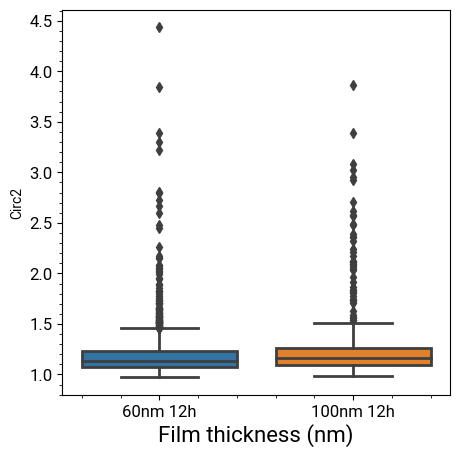

In [13]:
import seaborn as sns
mpl.style.use('default')
plt.rc('lines',linewidth=2)
#plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["legend.frameon"] = False
plt.rc('legend',fontsize=26)

fig, (ax0) = plt.subplots(1, 1, figsize=(5, 5))
major = pd.DataFrame()
#major['100nm']=df_100['major_axis_length']
#major['60nm']=df_60['major_axis_length']

sns.boxplot(x='thickness',y='Circ2', data=results,ax=ax0)
#sns.boxplot(x='thickness',y='ecc2', data=results,ax=ax1)
ax0.xaxis.set_tick_params(labelsize=12)
ax0.yaxis.set_tick_params(labelsize=12)
ax0.minorticks_on()

ax0.set_xlabel('Film thickness (nm)',fontsize=16)
ax1.set_xlabel('Film thickness (nm)',fontsize=16)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.minorticks_on()
ax0.set_ylabel('Circ2 (µm)',fontsize=16)
ax1.set_ylabel('ecc2 (µm)',fontsize=16)
ax0.set_ylim([0,10.5])


#ax0.set_ylim([0.8,2])
#ax1.set_ylim([0,1.25])
fig.savefig('boxplot_circ.svg',dpi=100,  bbox_inches='tight')
fig.savefig('boxplot_cir.png',dpi=100,   bbox_inches='tight')
fig.savefig('boxplot_cir.pdf',dpi=100,   bbox_inches='tight')

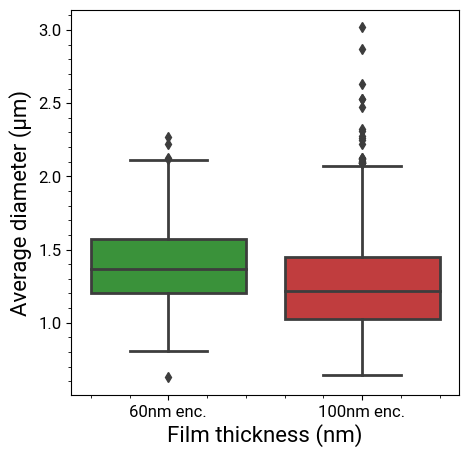

In [22]:



import seaborn as sns
mpl.style.use('default')
plt.rc('lines',linewidth=2)
#plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["legend.frameon"] = False
plt.rc('legend',fontsize=26)
keys=['60nm enc.','100nm enc.']
colors = ['C2','C3']
cmap = dict(zip(keys, colors)) 
fig, ax = plt.subplots(1, 1, figsize=(5, 5))


sns.boxplot(x='thickness',y='Av_diam', data=results_enc,ax=ax,palette=cmap)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.minorticks_on()

ax.set_xlabel('Film thickness (nm)',fontsize=16)

ax.set_ylabel('Average diameter (µm)',fontsize=16)


fig.savefig('boxplot_circ2.svg',dpi=100,  bbox_inches='tight')
fig.savefig('boxplot_cir2.png',dpi=100,   bbox_inches='tight')
fig.savefig('boxplot_cir2.pdf',dpi=100,   bbox_inches='tight')

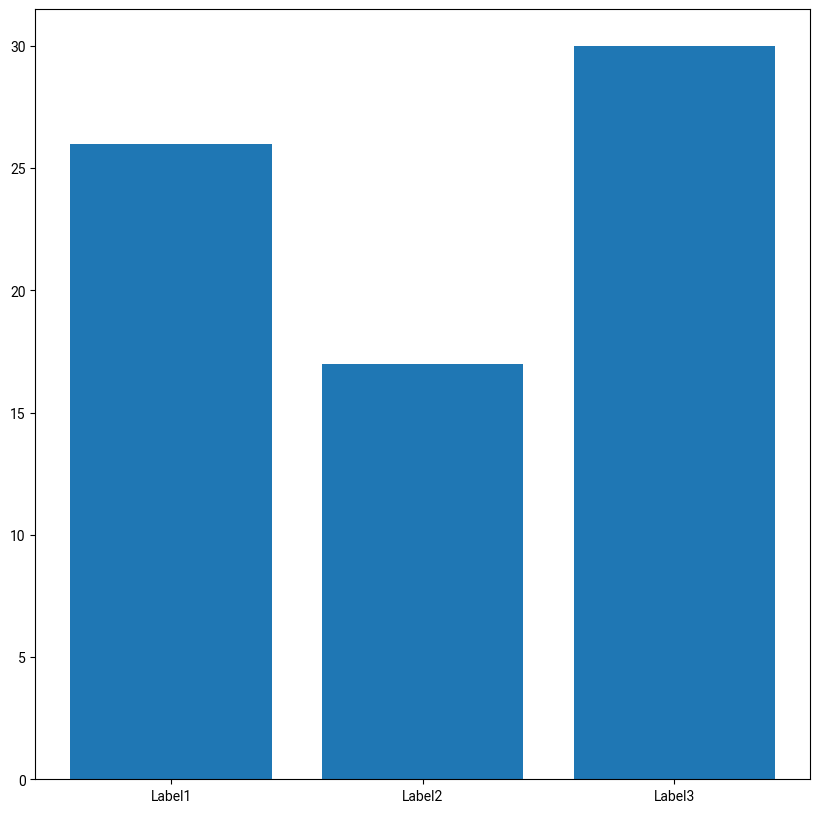

In [8]:
D = {u'Label1':26, u'Label2': 17, u'Label3':30}
plt.bar(*zip(*D.items()))
plt.show()

In [116]:
mpl.style.use('default')
plt.rc('lines',linewidth=2)
#plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["legend.frameon"] = False
plt.rc('legend',fontsize=26)
minor = pd.DataFrame()
minor['100nm']=df_100['minor_axis_length']
minor['60nm']=df_60['minor_axis_length']
boxplot = major.boxplot(column=['100nm','60nm'])

NameError: name 'df_100' is not defined

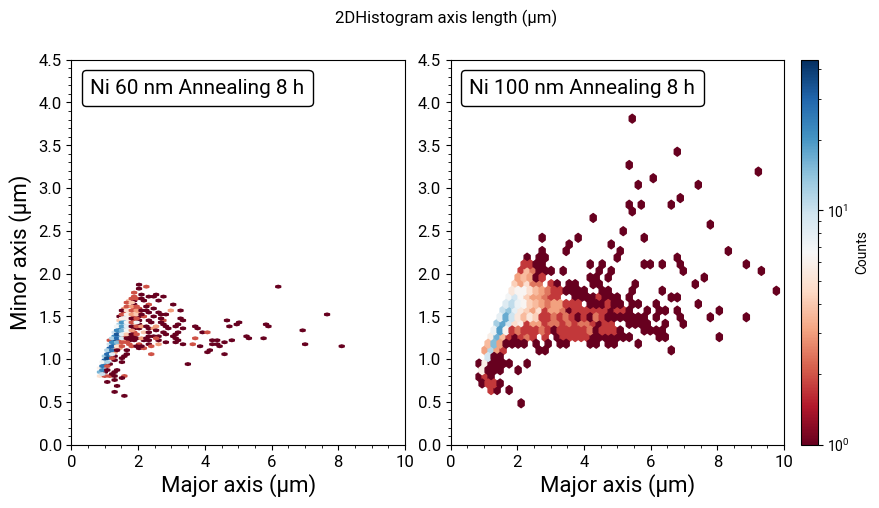

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.offsetbox import AnchoredText

mpl.style.use('default')
plt.rc('lines',linewidth=2)
#plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["legend.frameon"] = False
plt.rc('legend',fontsize=26)


fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(10, 5),gridspec_kw={"width_ratios":[1,1, 0.05]})
f1=ax0.hexbin(df_60_8['major_axis_length'], df_60_8['minor_axis_length'],bins=40, 
             cmap='RdBu',norm=colors.LogNorm(),gridsize=50)
at = AnchoredText("Ni 60 nm Annealing 8 h",
                  prop=dict(size=15), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax0.add_artist(at)

ax1.hexbin(df_100_8['major_axis_length'], df_100_8['minor_axis_length'],bins=40, 
             cmap='RdBu',norm=colors.LogNorm(),gridsize=50)
at = AnchoredText("Ni 100 nm Annealing 8 h",
                  prop=dict(size=15), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)
ax0.xaxis.set_tick_params(labelsize=12)
ax0.yaxis.set_tick_params(labelsize=12)
ax0.minorticks_on()

ax0.set_ylabel('Minor axis (µm)',fontsize=16)

ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.minorticks_on()

ax1.set_xlabel('Major axis (µm)',fontsize=16)
ax0.set_xlabel('Major axis (µm)',fontsize=16)

for ax in (ax0,ax1):
    ax.set_ylim([0,4.5])
    ax.set_xlim([0,10])

    
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

ip = InsetPosition(ax1, [1.05,0,0.05,1]) 
ax2.set_axes_locator(ip)

cb = fig.colorbar(f1, cax=ax2, ax=[ax0,ax1])
cb.set_label('Counts')
plt.suptitle('2DHistogram axis length (µm)')

fig.savefig('2dHist.svg',dpi=100,  bbox_inches='tight')
fig.savefig('2dHist.png',dpi=100,   bbox_inches='tight')
fig.savefig('2dHist.pdf',dpi=100,   bbox_inches='tight')

ValueError: The palette dictionary is missing keys: {'100nm enc.', '60nm enc.'}

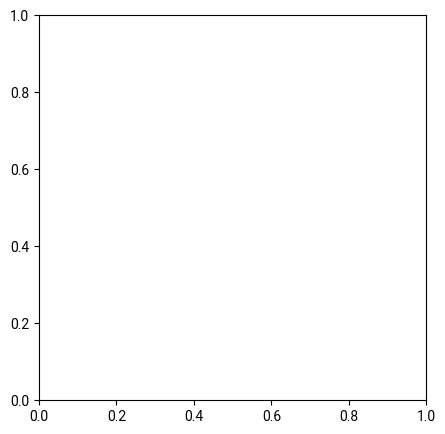

In [16]:
##Nice plots

#define style
mpl.style.use('default')
plt.rc('lines',linewidth=2)
#plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["legend.frameon"] = False
plt.rc('legend',fontsize=20)



fig, ax0 = plt.subplots(1, 1, figsize=(5, 5))
#results.groupby('thickness').plot.scatter(x="Av_diam", y="Circ2",ax=ax0,groupby=)
keys=['60nm 12h enc','100nm 12h']
colors = ['C0','C1']  # get a number of colors
cmap = dict(zip(keys, colors))  # zip values to colors


scatter=sns.scatterplot(x='minor_axis_length', y='Circ2', hue='thickness', data=results_enc, 
                        palette=cmap,ax=ax0,alpha=0.3,legend=True)
 
#plt.annotate('60 nm-8 h', xy=(5.5, 5.2), xytext=(12.5,13), size=12,
       # textcoords='offset points', ha='left', va='bottom',color='C0')

#df_100_8.plot.scatter(x="Av_diam", y="Circ2",s=100,
#                         color='C2',ax=ax0,alpha=0.4,legend='Ni_100nm',colorbar=False)
#df_60_12.plot.scatter(x="Av_diam", y="Circ2",s=100,color='C1',
#                                                ax=ax0,legend='Ni 60nm',alpha=0.4)
#df_100_12.plot.scatter(x="Av_diam", y="Circ2",s=100,
#                         color='C3',ax=ax0,alpha=0.4,legend='Ni_100nm',colorbar=False)
#plt.annotate('100 nm-8 h', xy=(5.5, 4.60), xytext=(12.5,12), size=12, 
        # textcoords='offset points', ha='left', va='bottom',color='C2')
#plt.annotate('60 nm-12 h', xy=(5.5, 4.90), xytext=(12.5,12), size=12, 
        # textcoords='offset points', ha='left', va='bottom',color='C1')
#plt.annotate('100 nm-12 h', xy=(5.5, 4.30), xytext=(12.5,12), size=12, 
        # textcoords='offset points', ha='left', va='bottom',color='C3')
#df_60_8.plot.scatter(x="Av_diam", y="Circ2",s=100,color='C0',
#                                                ax=ax0,legend='Ni 60nm',alpha=0.4)
#ax0.legend()
ax0.xaxis.set_tick_params(labelsize=12)
ax0.yaxis.set_tick_params(labelsize=12)
ax0.minorticks_on()

ax0.set_ylabel('Circularity ',fontsize=16)

ax1.set_ylabel(None)

ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.minorticks_on()

ax1.set_xlabel('Minor axis length (µm)',fontsize=16)
ax0.set_xlabel('Minor axis length (µm)',fontsize=16)

for ax in (ax0,ax1):
    ax.set_ylim([0.9,6])
    ax.set_xlim([0.3,6])

x=np.linspace(0,25)
y=np.ones(50)
plt.setp(ax0.get_legend().get_texts(), fontsize='10')
ax0.plot(x,y,':r',alpha=0.5)
#ax1.plot(x,y,':r',alpha=0.5)

#plt.suptitle('Axis length (µm)')
#ax0.set_yscale('log')
#plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=['Ni 60', 'Ni 100'])

#plt.legend([f1, f2], ['Ni 60nm','Ni 100nm'])
plt.tight_layout
plt.legend(loc='upper left')
plt.legend(title='Film', fontsize='10', title_fontsize='10')
#
fig.savefig('Feret-max_vs_min_comp.svg',dpi=100,  bbox_inches='tight')
fig.savefig('Feret-max_vs_min_comp.png',dpi=100,   bbox_inches='tight')
fig.savefig('Feret-max_vs_min_comp.pdf',dpi=100,   bbox_inches='tight')

NameError: name 'df_60_2t' is not defined

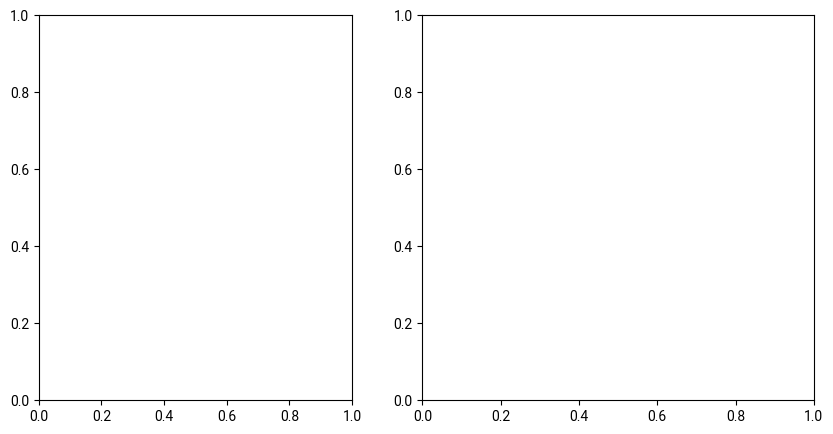

In [16]:
##Nice plots

#define style
mpl.style.use('default')
plt.rc('lines',linewidth=2)
#plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["legend.frameon"] = False
plt.rc('legend',fontsize=20)



fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={"width_ratios":[1,1.25]})
f1 = df_60_2t[df_60_2t['Circ2']<=20].plot.scatter(x="major_axis_length", y="minor_axis_length",c="Circ2",s=100,
                         colormap='RdBu',ax=ax1,legend='Ni 2nd Annealing',alpha=1)



at = AnchoredText("Ni60 8h",
                  prop=dict(size=15), frameon=True,
                  loc='upper left',
                  )


at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax0.add_artist(at)

df_60_8[df_60_8['Circ2']<=20].plot.scatter(x="major_axis_length", y="minor_axis_length",c="Circ2",s=100,
                         colormap='RdBu',ax=ax0,alpha=1,legend='Ni_60nm',colorbar=False)
at = AnchoredText("Ni60 2nd Annealing",
                  prop=dict(size=15), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at)
ax0.xaxis.set_tick_params(labelsize=12)
ax0.yaxis.set_tick_params(labelsize=12)
ax0.minorticks_on()

ax0.set_ylabel('Minor axis (µm)',fontsize=16)

ax1.set_ylabel(None)

ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.minorticks_on()

ax1.set_xlabel('Major axis (µm)',fontsize=16)
ax0.set_xlabel('Major axis (µm)',fontsize=16)

for ax in (ax0,ax1):
    ax.set_ylim([0,4.5])
    ax.set_xlim([0,10])

x=np.linspace(0,10)
y=np.linspace(0,10)

ax0.plot(x,y,':r',alpha=0.5)
ax1.plot(x,y,':r',alpha=0.5)

#plt.suptitle('Axis length (µm)')





ax.legend()
plt.tight_layout


#
fig.savefig('Feret-max_vs_min_comp60-2t.svg',dpi=100,  bbox_inches='tight')
fig.savefig('Feret-max_vs_min_comp60-2t.png',dpi=100,   bbox_inches='tight')
fig.savefig('Feret-max_vs_min_comp60-2t.pdf',dpi=100,   bbox_inches='tight')

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(results, alpha=0.2, figsize=(20,20), diagonal="kde");